# HomeWork 5 Juypter Book

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Deep-Learning

NOTE FOR GRADER : THIS NOTEBOOK REQUIRES MULTIPLE FILES AS OUTLINE IN THE IMPORT LIST, OTHERWISE THIS WILL NOT WORK

In [88]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from data.hw5DataLoaderTranslation import *
from training.trainTranslation import *
from training.basicEval import *
from model.transformer import *
from model.predictor import *
from data.hw4Text import french_to_english, english_to_french

from torch.utils.data import Dataset, DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 50

# Problem 3

In this homework, we focus on sequence-to-sequence modeling, similar to homework 4.

Developed a Transformer-based encoder-decoder architecture for English to French Translation. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. For this, explore transformer architecture with 1, 2, and 4 layers, with 2 and 4 heads (8 different combinations). Also, try some qualitative validation as well, asking the network to generate French translations for some English sentences. Compare your results against and RNN-based network with attention and without attention.

In [90]:
# Create the dataset instance
dataset = EngFrDataset(english_to_french)

# Split the dataset into training and validation sets
# Example: 80% training, 20% validation
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

# Create DataLoaders for training and validation
trainingLoaders = DataLoader(train_dataset, batch_size=32, shuffle=True)
validationLoaders = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Calculate input and output size based on the vocabularies
inputSize = len(dataset.eng_vocab.word2index)  # Number of unique words in English vocabulary
outputSize = len(dataset.fr_vocab.word2index)  # Number of unique words in French vocabulary

# Print the sizes
print(f"Input size (English vocab size): {inputSize}")
print(f"Output size (French vocab size): {outputSize}")

Input size (English vocab size): 187
Output size (French vocab size): 205


In [91]:
hiddenSize = 64
numLayers = 4
nhead = 2


model = TransformerII(input_size=inputSize, 
                    hidden_size=hiddenSize, 
                    output_size=outputSize, 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)

trainLosses, valLosses, trainAccuracies, valAccuracies, epochTimes, trueLabelsList, predictedLabelsList = trainModel(model, 
                                                                                                                     trainingLoaders, 
                                                                                                                     validationLoaders, 
                                                                                                                     epochs=epochs, 
                                                                                                                     learningRate=0.0001)

Training on device: cpu
Epoch 10/50 | Train Loss: 3.2907 | Train Acc: 52.30% | Val Loss: 3.5114 | Val Acc: 47.50%
  Epoch time: 0.12 sec | Inference time: 1.07 sec
Epoch 20/50 | Train Loss: 3.1378 | Train Acc: 52.30% | Val Loss: 3.3833 | Val Acc: 47.50%
  Epoch time: 0.12 sec | Inference time: 2.24 sec
Epoch 30/50 | Train Loss: 2.9770 | Train Acc: 52.46% | Val Loss: 3.2902 | Val Acc: 47.50%
  Epoch time: 0.12 sec | Inference time: 3.40 sec
Epoch 40/50 | Train Loss: 2.7613 | Train Acc: 53.61% | Val Loss: 3.2187 | Val Acc: 48.75%
  Epoch time: 0.12 sec | Inference time: 4.57 sec
Epoch 50/50 | Train Loss: 2.5104 | Train Acc: 58.20% | Val Loss: 3.1355 | Val Acc: 48.75%
  Epoch time: 0.13 sec | Inference time: 5.73 sec

Training complete.
Total training time: 6.36 seconds
Average time per epoch: 0.12 seconds


Final Training Accuracy: 58.20%
Final Validation Accuracy: 48.75%
Total Training Time: 5.87 seconds


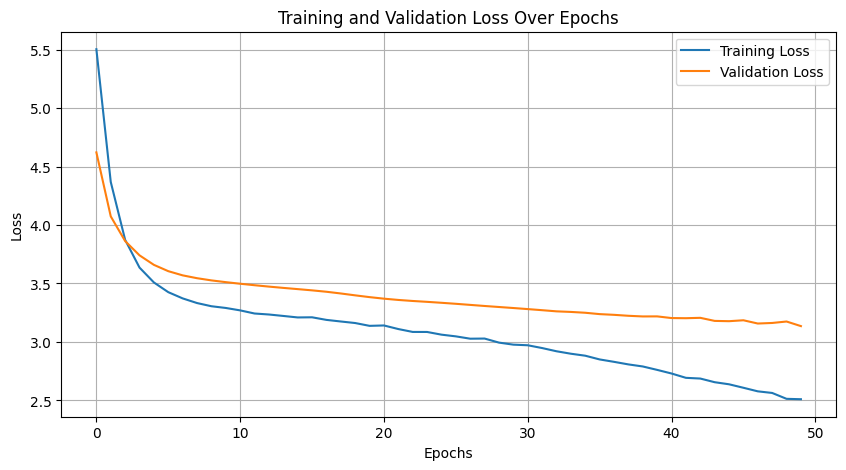

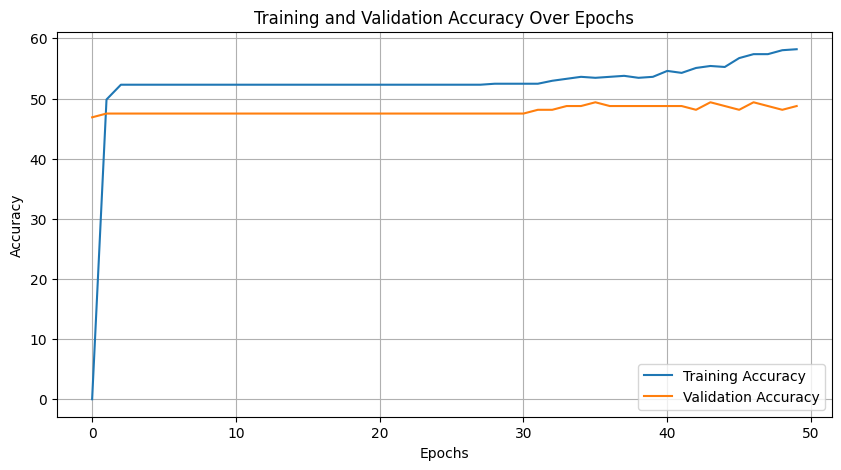

In [92]:
reportFinalMetrics(trainAccuracies, valAccuracies, epochTimes)
plotLoss(trainLosses, valLosses)
plotAccuracy(trainAccuracies, valAccuracies)

In [93]:
num_examples = 5

for i in range(num_examples):

    sentence = dataset.fr_sentences[i]

    translation = generate_translation(model, sentence, len(sentence.split()), dataset.eng_vocab, dataset.fr_vocab, device)
    
    # Print the original and translated sentences
    print(f'Example {i + 1}:')
    print('Original Sentence:', sentence)
    print('Translated Sentence:', translation)
    print()

Example 1:
Original Sentence: J'ai froid
Translated Sentence: <PAD> <PAD>

Example 2:
Original Sentence: Tu es fatigué
Translated Sentence: together French world

Example 3:
Original Sentence: Il a faim
Translated Sentence: together French world

Example 4:
Original Sentence: Elle est heureuse
Translated Sentence: together French world

Example 5:
Original Sentence: Nous sommes amis
Translated Sentence: together French world



# Problem 4

Like homework 4, Repeat problem 3, this time try to translate from French to English. For this, explore transformer architecture with 1, 2, and 4 layers, with 2 and 4 heads (8 different combinations). Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate French translations for some English sentences. Which one seems to be more effective, French-to-English or English-to-French? Compare your results against RNN-based models.

In [94]:
dataset = EngFrDataset(french_to_english)
trainingLoaders = DataLoader(dataset, batch_size=32, shuffle=True)
validationLoaders = DataLoader(dataset, batch_size=32, shuffle=False)

inputSize = len(dataset.eng_vocab.word2index)
outputSize = len(dataset.fr_vocab.word2index)

In [95]:
hiddenSize = 512
numLayers = 4
nhead = 2


model = TransformerII(input_size=inputSize, 
                    hidden_size=hiddenSize, 
                    output_size=outputSize, 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)

trainLosses, valLosses, trainAccuracies, valAccuracies, epochTimes, trueLabelsList, predictedLabelsList = trainModel(model, 
                                                                                                                     trainingLoaders, 
                                                                                                                     validationLoaders, 
                                                                                                                     epochs=epochs, 
                                                                                                                     learningRate=0.0001)

Training on device: cpu
Epoch 10/50 | Train Loss: 1.8157 | Train Acc: 57.66% | Val Loss: 1.6681 | Val Acc: 58.05%
  Epoch time: 0.53 sec | Inference time: 4.62 sec
Epoch 20/50 | Train Loss: 0.7105 | Train Acc: 88.57% | Val Loss: 0.6015 | Val Acc: 89.74%
  Epoch time: 0.51 sec | Inference time: 9.77 sec
Epoch 30/50 | Train Loss: 0.3762 | Train Acc: 90.00% | Val Loss: 0.3378 | Val Acc: 90.00%
  Epoch time: 0.51 sec | Inference time: 14.81 sec
Epoch 40/50 | Train Loss: 0.3134 | Train Acc: 90.00% | Val Loss: 0.2925 | Val Acc: 90.00%
  Epoch time: 0.50 sec | Inference time: 19.96 sec
Epoch 50/50 | Train Loss: 0.2913 | Train Acc: 90.00% | Val Loss: 0.2793 | Val Acc: 90.00%
  Epoch time: 0.50 sec | Inference time: 25.02 sec

Training complete.
Total training time: 31.25 seconds
Average time per epoch: 0.51 seconds


Final Training Accuracy: 90.00%
Final Validation Accuracy: 90.00%
Total Training Time: 25.52 seconds


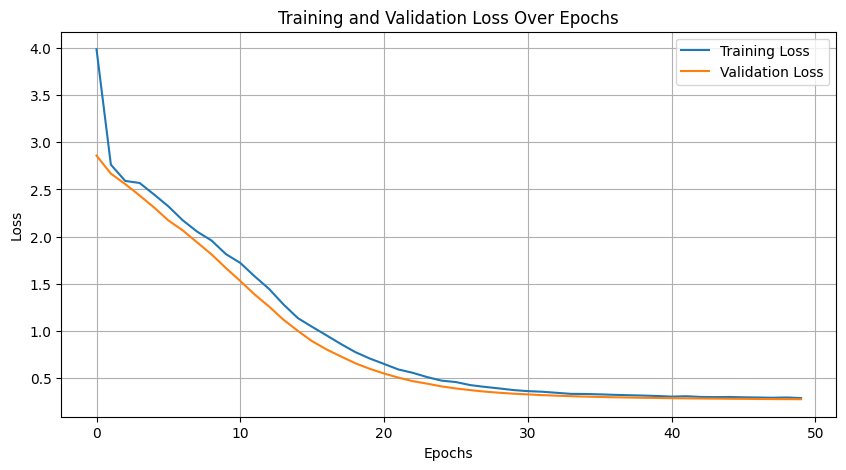

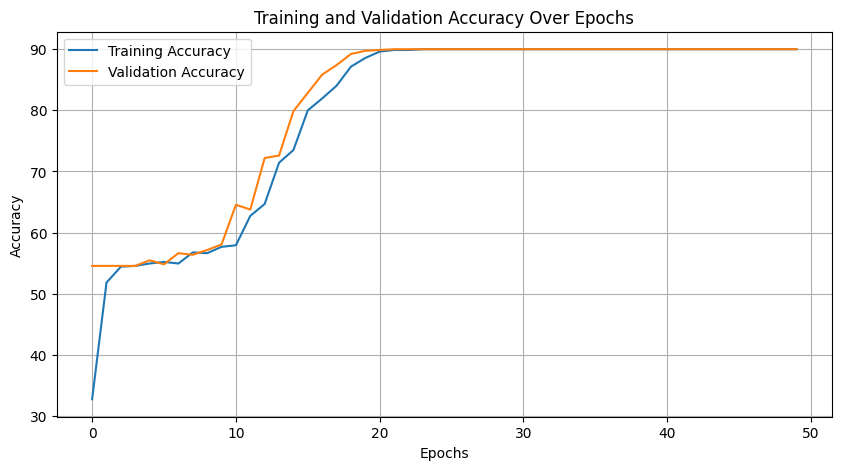

In [96]:
reportFinalMetrics(trainAccuracies, valAccuracies, epochTimes)
plotLoss(trainLosses, valLosses)
plotAccuracy(trainAccuracies, valAccuracies)

In [97]:
num_examples = 5

for i in range(num_examples):

    sentence = dataset.fr_sentences[i]

    translation = generate_translation(model, sentence, len(sentence.split()), dataset.eng_vocab, dataset.fr_vocab, device)
    
    # Print the original and translated sentences
    print(f'Example {i + 1}:')
    print('Original Sentence:', sentence)
    print('Translated Sentence:', translation)
    print()

Example 1:
Original Sentence: I am cold
Translated Sentence: gâteau gâteau gâteau

Example 2:
Original Sentence: You are tired
Translated Sentence: gâteau gâteau gâteau

Example 3:
Original Sentence: He is hungry
Translated Sentence: faim Elle faim

Example 4:
Original Sentence: She is happy
Translated Sentence: faim heureuse faim

Example 5:
Original Sentence: We are friends
Translated Sentence: gâteau gâteau gâteau



# Problem 4 Trying Different Layers and Heads

In [98]:
dataset = EngFrDataset(french_to_english)
trainingLoaders = DataLoader(dataset, batch_size=32, shuffle=True)
validationLoaders = DataLoader(dataset, batch_size=32, shuffle=False)

inputSize = len(dataset.eng_vocab.word2index)
outputSize = len(dataset.fr_vocab.word2index)

hiddenSize = 512
numLayers = 3
nhead = 2


model = TransformerII(input_size=inputSize, 
                    hidden_size=hiddenSize, 
                    output_size=outputSize, 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)

trainLosses, valLosses, trainAccuracies, valAccuracies, epochTimes, trueLabelsList, predictedLabelsList = trainModel(model, 
                                                                                                                     trainingLoaders, 
                                                                                                                     validationLoaders, 
                                                                                                                     epochs=epochs, 
                                                                                                                     learningRate=0.0001)

Training on device: cpu
Epoch 10/50 | Train Loss: 1.6518 | Train Acc: 60.65% | Val Loss: 1.5110 | Val Acc: 64.03%
  Epoch time: 0.38 sec | Inference time: 3.39 sec
Epoch 20/50 | Train Loss: 0.6984 | Train Acc: 88.83% | Val Loss: 0.6061 | Val Acc: 89.09%
  Epoch time: 0.39 sec | Inference time: 7.20 sec
Epoch 30/50 | Train Loss: 0.3899 | Train Acc: 90.00% | Val Loss: 0.3439 | Val Acc: 90.00%
  Epoch time: 0.39 sec | Inference time: 11.03 sec
Epoch 40/50 | Train Loss: 0.3163 | Train Acc: 90.00% | Val Loss: 0.2960 | Val Acc: 90.00%
  Epoch time: 0.38 sec | Inference time: 14.88 sec
Epoch 50/50 | Train Loss: 0.2964 | Train Acc: 90.00% | Val Loss: 0.2818 | Val Acc: 90.00%
  Epoch time: 0.37 sec | Inference time: 18.64 sec

Training complete.
Total training time: 23.33 seconds
Average time per epoch: 0.38 seconds


Final Training Accuracy: 90.00%
Final Validation Accuracy: 90.00%
Total Training Time: 19.01 seconds


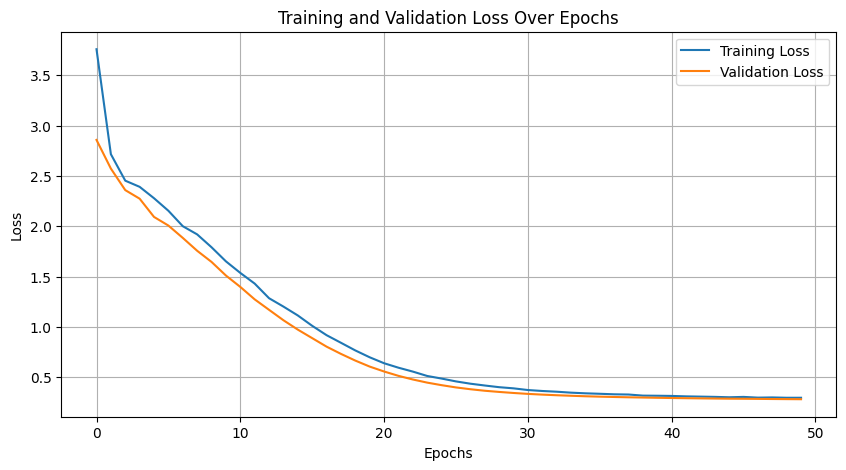

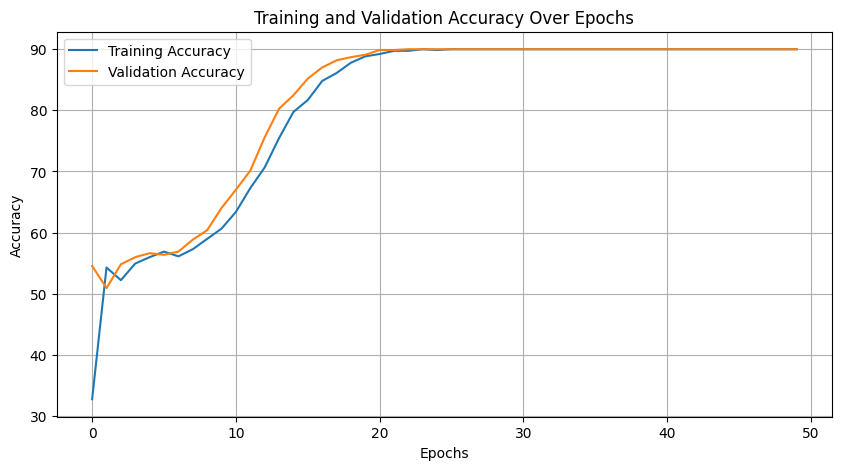

In [99]:
reportFinalMetrics(trainAccuracies, valAccuracies, epochTimes)
plotLoss(trainLosses, valLosses)
plotAccuracy(trainAccuracies, valAccuracies)